# Housing Price Prediction 

### Problem Statement:

Consider a real estate corporation with a dataset comprising property values in the any area. It wants to use the data to optimise property selling prices based on crucial characteristics like space, bedrooms, parking, and so on.

Aim —


- To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

- To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

- To know the accuracy of the model, i.e. how well these variables can predict house prices.

### Data
Use housing dataset from kaggle.

## Reading and Understanding the Data

In [147]:
# Importing Libraries

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

#remove warnings
import warnings
warnings.filterwarnings('ignore')

In [148]:
data = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/House Price Prediction using ML/Housing.csv"))

In [149]:
# Check the head of the dataset
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Data overview

In [150]:
#Check the shape of dataset
data.shape

(545, 13)

In [151]:
# Dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [152]:
# Describe Dataset
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


This way we can quickly see basic metrics like average, median, percentile for different features.

In [153]:
# describe categorical values columns
data.describe(include = 'object').transpose()

,count,unique,top,freq
mainroad,545,2,yes,468
guestroom,545,2,no,448
basement,545,2,no,354
hotwaterheating,545,2,no,520
airconditioning,545,2,no,373
prefarea,545,2,no,417
furnishingstatus,545,3,semi-furnished,227


## Data Cleaning

In [154]:
# Checking Null values
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [155]:
### Count the values 
for c in data.columns:
    print("---- %s ---" % c)
    print(data[c].value_counts())

---- price ---
3500000     17
4200000     17
4900000     12
3150000      9
5600000      9
            ..
6580000      1
4319000      1
4375000      1
4382000      1
13300000     1
Name: price, Length: 219, dtype: int64
---- area ---
6000    24
3000    14
4500    13
4000    11
5500     9
        ..
6862     1
4815     1
9166     1
6321     1
3620     1
Name: area, Length: 284, dtype: int64
---- bedrooms ---
3    300
2    136
4     95
5     10
6      2
1      2
Name: bedrooms, dtype: int64
---- bathrooms ---
1    401
2    133
3     10
4      1
Name: bathrooms, dtype: int64
---- stories ---
2    238
1    227
4     41
3     39
Name: stories, dtype: int64
---- mainroad ---
yes    468
no      77
Name: mainroad, dtype: int64
---- guestroom ---
no     448
yes     97
Name: guestroom, dtype: int64
---- basement ---
no     354
yes    191
Name: basement, dtype: int64
---- hotwaterheating ---
no     520
yes     25
Name: hotwaterheating, dtype: int64
---- airconditioning ---
no     373
yes    172
Na

In [156]:
# Checking for duplicate
data.duplicated().sum()

0

Observations:

1. Data size is (545,13)

2. None of the columns has Null values

3. There is not any duplicated value in housing dataset

4. 'price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking' has numerical values

5. 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning' , 'prefarea' has yes/no values

6. 'furnishingstatus' has three values viz. 'furnished', 'semi-furnished', 'unfurnished'

## Exploratory Data Analytics


### Visualising Numeric Variables

Let's make a dist plot of all the numeric variables

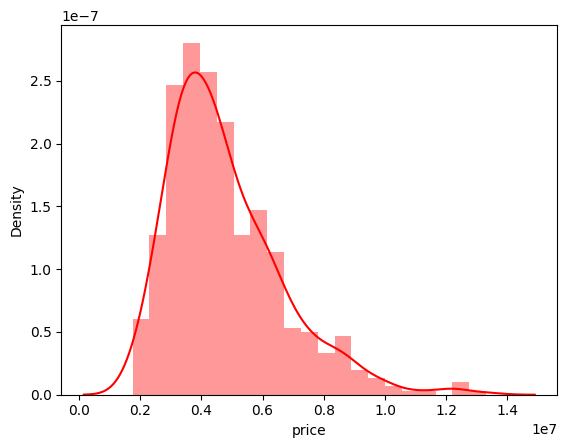

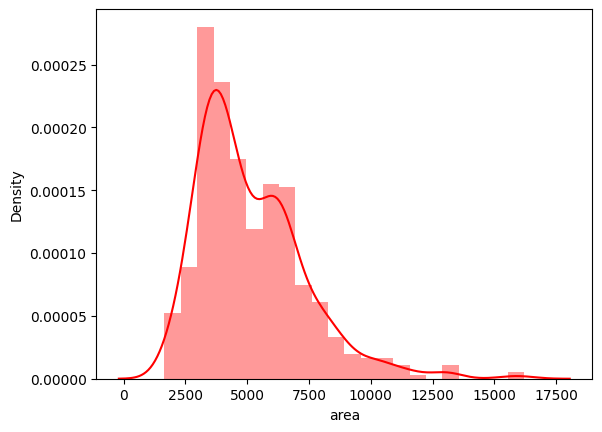

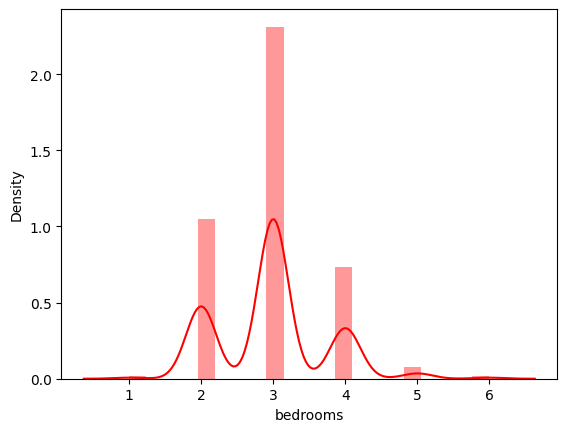

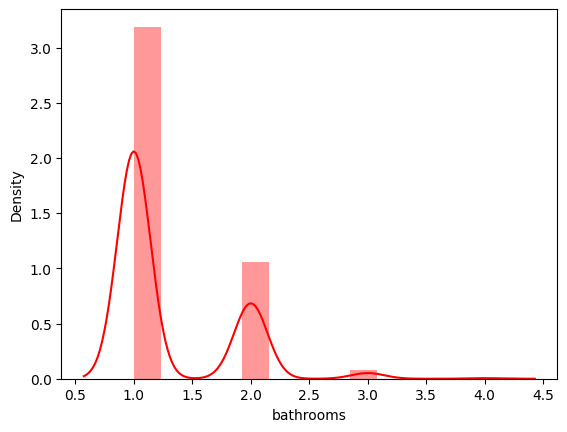

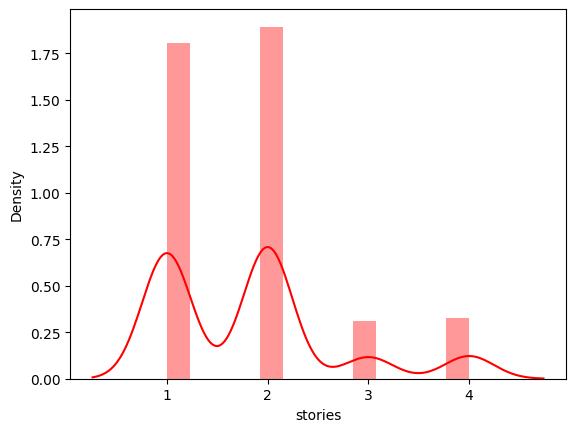

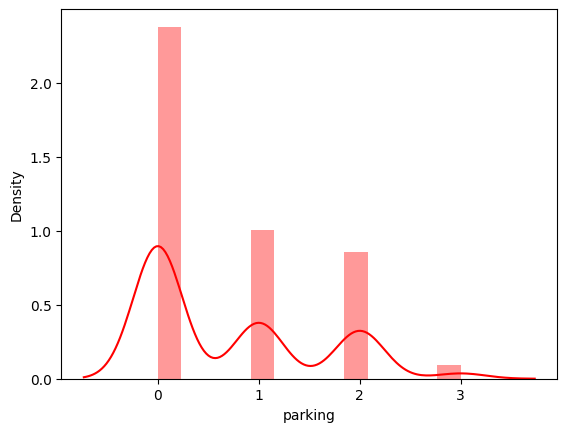

In [157]:
df_numerics_only = data.select_dtypes(include=np.number)
for column in df_numerics_only.columns:
    
    sns.distplot(data[column],color="red") # Stack these distributions together with different colors 
    plt.show()


Observations:

The Distplot of price and area column are approximately normally distributed. And if we see other columns like bedroom, bathroom, stories, and parking these are not normally distributed.

#### Visualising Categorical Variables

There are a few categorical variables as well, as you may have seen. Let's depict some of these variables as a bar graph.

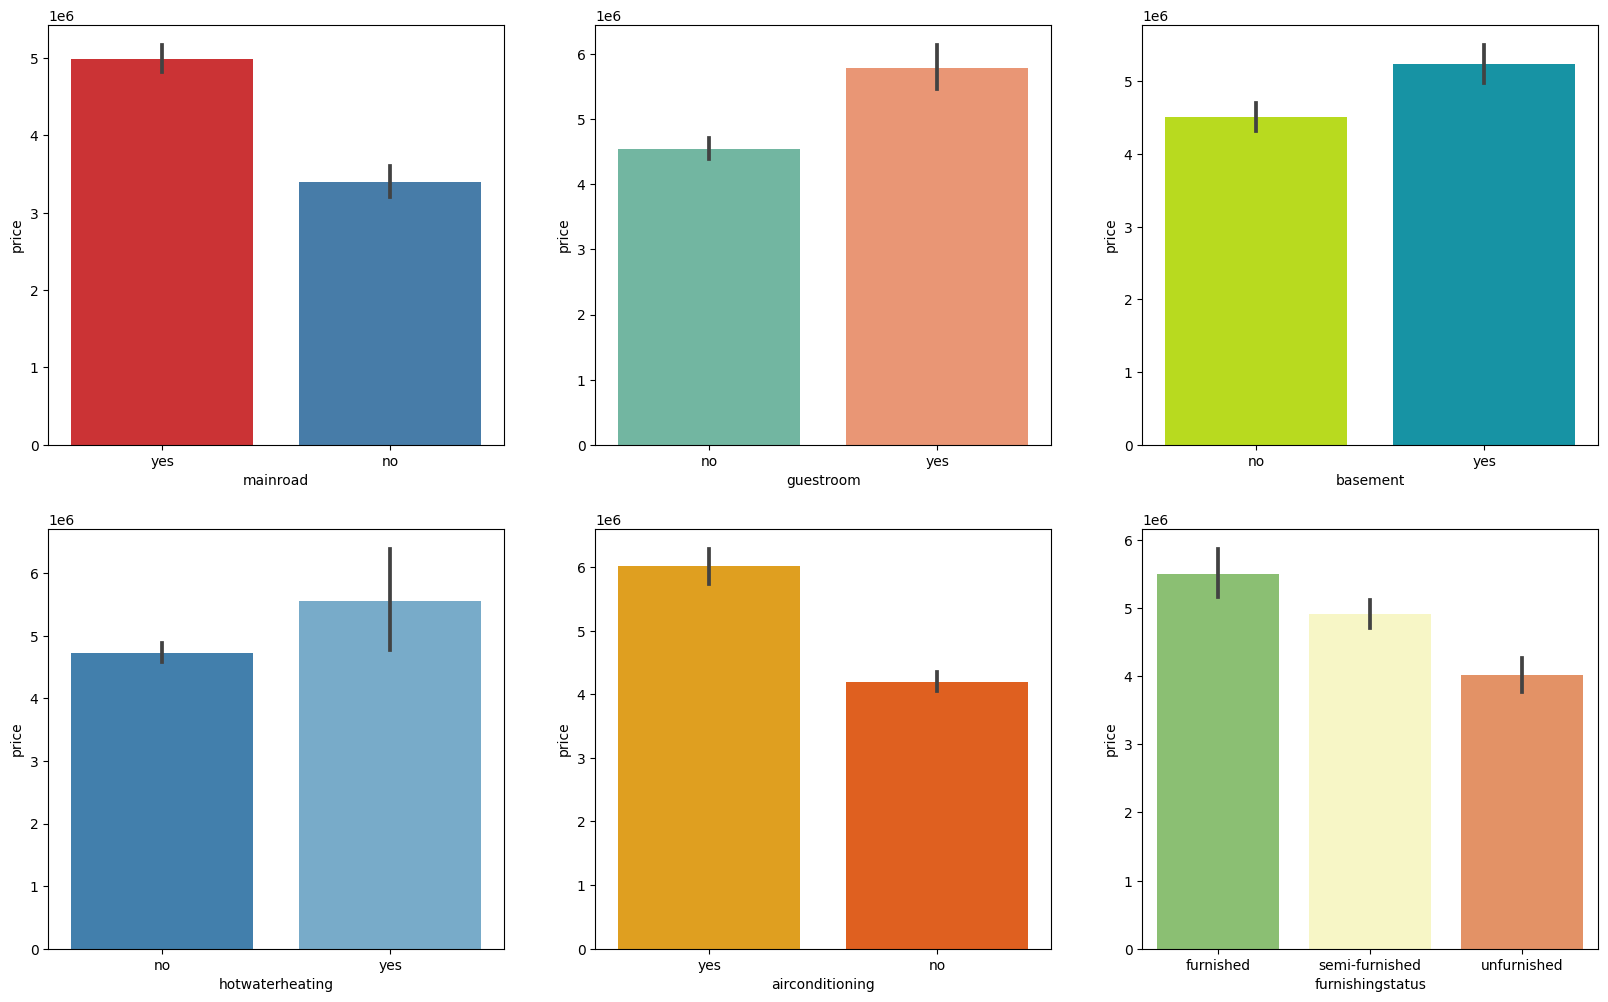

In [158]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.barplot(x = 'mainroad', y = 'price', data = data,palette='Set1')
plt.subplot(2,3,2)
sns.barplot(x = 'guestroom', y = 'price', data = data,palette='Set2')
plt.subplot(2,3,3)
sns.barplot(x = 'basement', y = 'price', data = data,palette='nipy_spectral_r')
plt.subplot(2,3,4)
sns.barplot(x = 'hotwaterheating', y = 'price', data = data,palette='tab20c')
plt.subplot(2,3,5)
sns.barplot(x = 'airconditioning', y = 'price', data = data,palette='autumn_r')
plt.subplot(2,3,6)
sns.barplot(x = 'furnishingstatus', y = 'price', data = data,palette='RdYlGn_r')
plt.show()

Observations:
1. The house is on road, their price is high.
2. Those houses which do not have guest room, their price is less.
3. Those houses which do not have basement, their price is less.
4. Those houses who provide hot waterheating fecalites , their price is High.
5. Those houses who provide furnishing , their price is High followed by semi furnished.

## Feature Engineering & Feature Selection 

### Outlier Detection

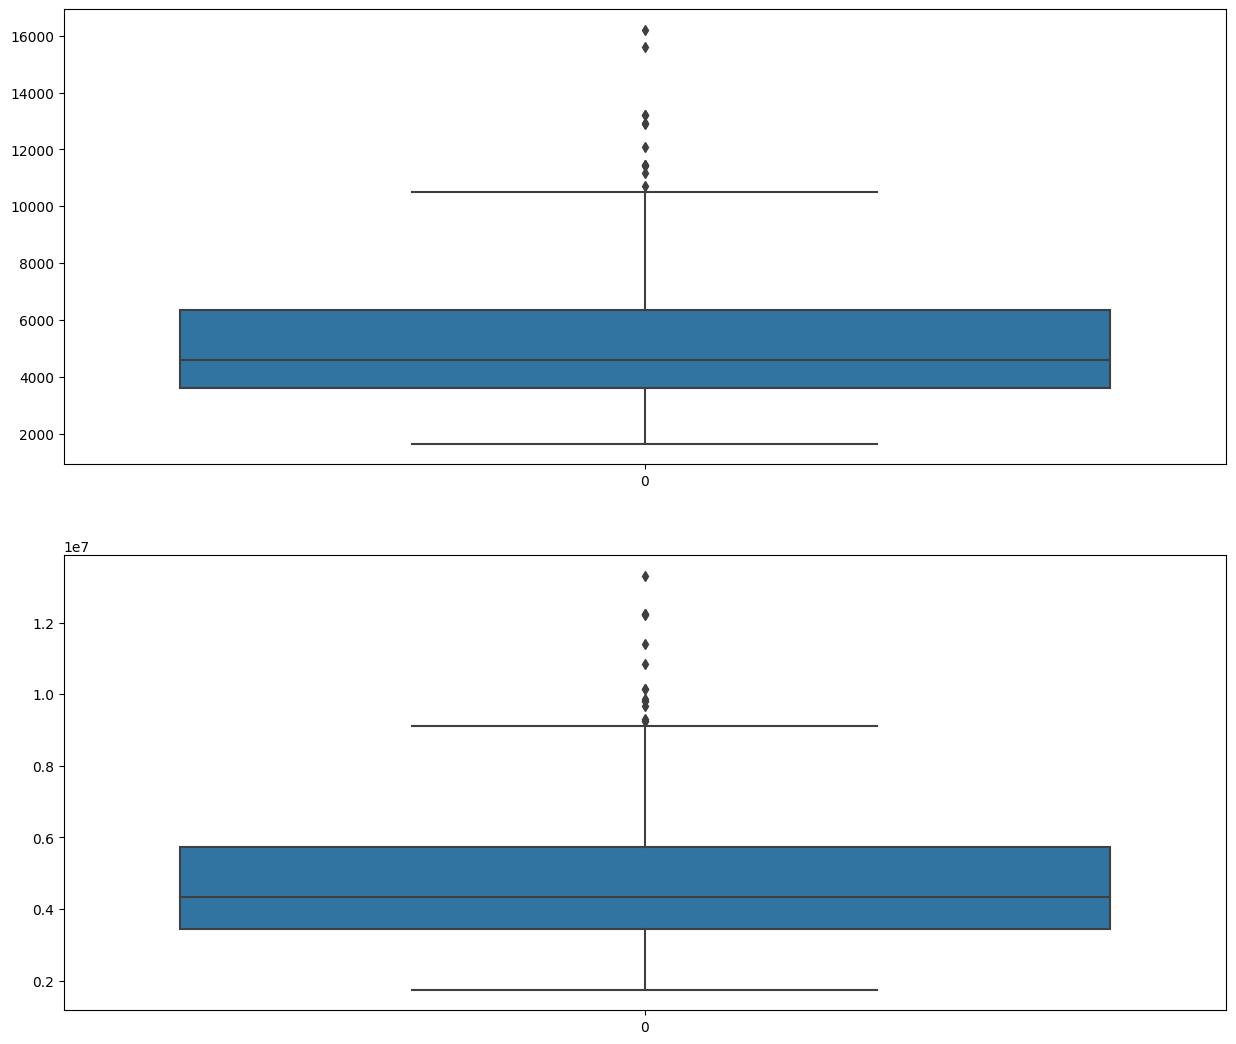

In [159]:
# Outlier Analysis
fig, axs = plt.subplots(2,1, figsize=(15, 13))

plt1 = sns.boxplot(data['area'], ax = axs[0])
plt1 = sns.boxplot(data['price'], ax = axs[1])

plt.show()

Outlier Treatment :
1. Price and area have considerable outliers.
2. We can drop the outliers as we have sufficient data.

In [160]:
# outlier treatment for price
Q1 = data.price.quantile(0.25)
Q3 = data.price.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.price >= Q1 - 1.5*IQR) & (data.price <= Q3 + 1.5*IQR)]

In [161]:
# outlier treatment for area
Q1 = data.area.quantile(0.25)
Q3 = data.area.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.area >= Q1 - 1.5*IQR) & (data.area <= Q3 + 1.5*IQR)]

In [162]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

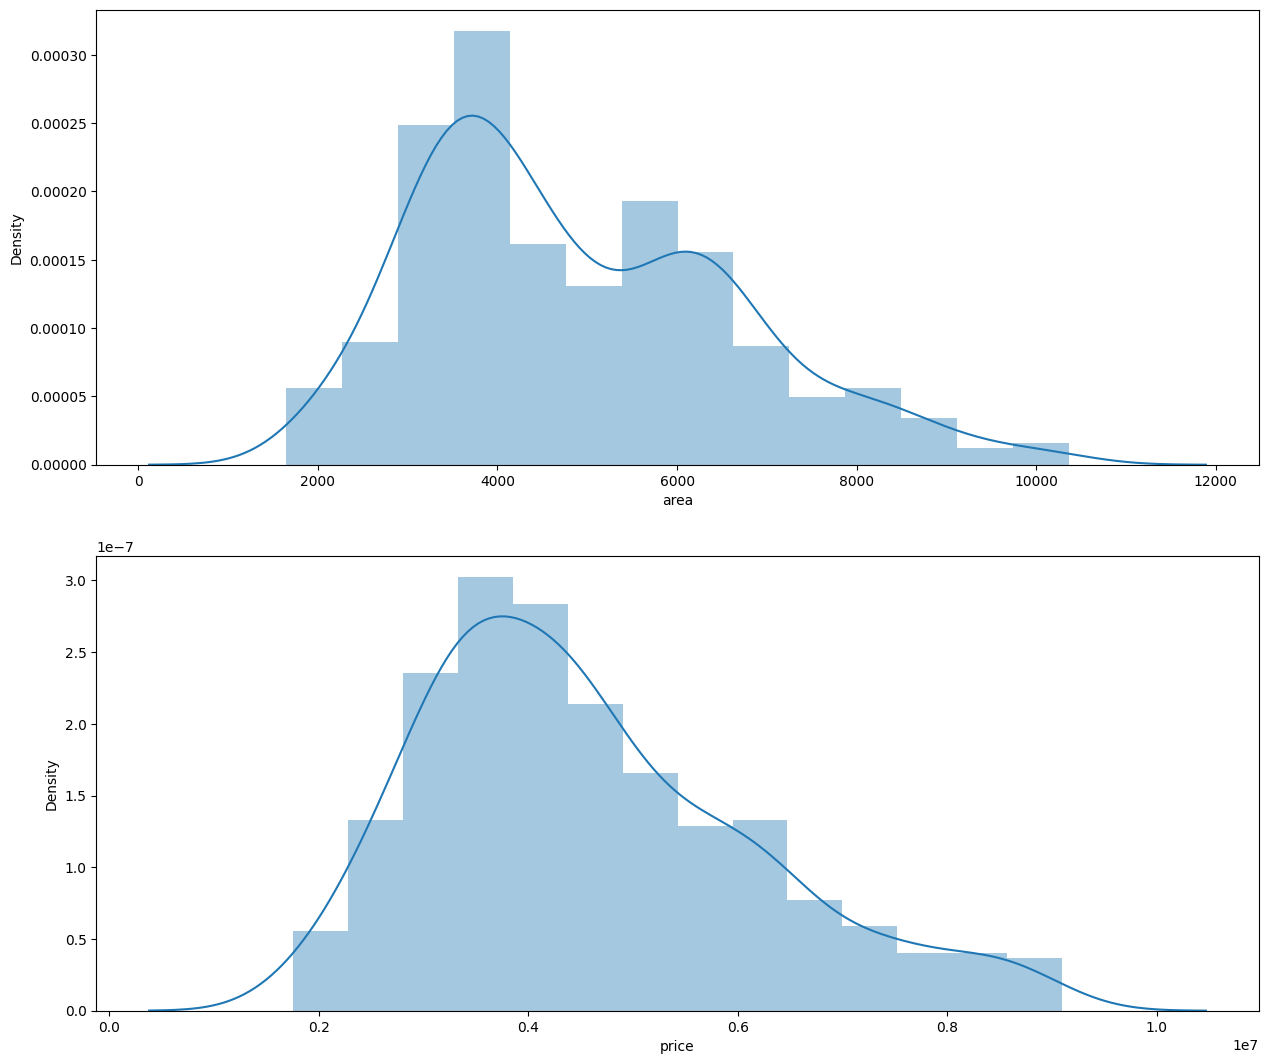

In [163]:
# Outlier Analysis
fig, axs = plt.subplots(2,1, figsize=(15, 13))

plt1 = sns.distplot(data['area'], ax = axs[0])
plt1 = sns.distplot(data['price'], ax = axs[1])

plt.show()

Here we removed lot of outliers, It's look good.

### Pearson correlation for numerical variable

In [164]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished
17,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished


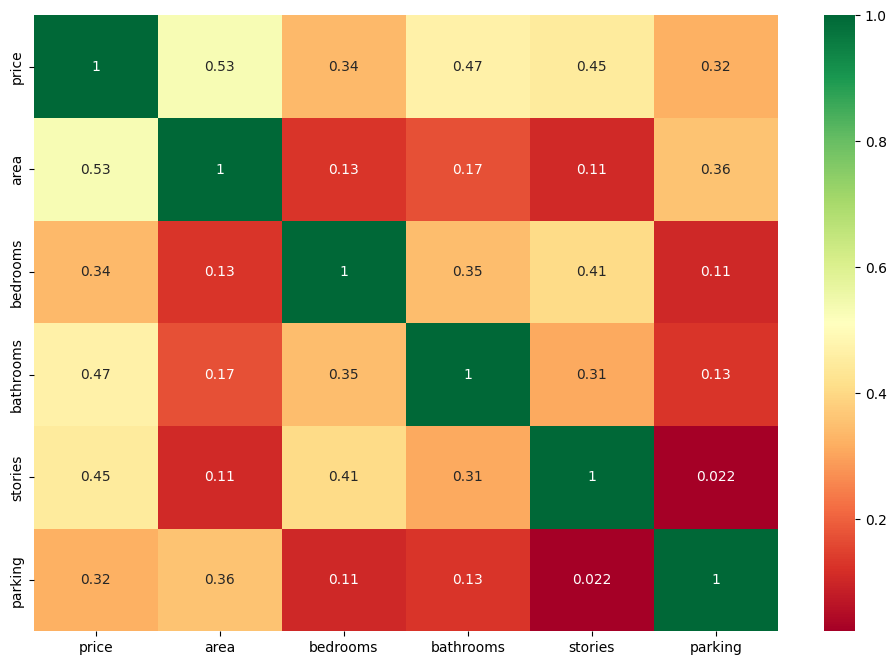

In [165]:
#Displaying Correlation between varaibles using heatmap
plt.figure(figsize=(12,8))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.RdYlGn)
plt.show()

In [166]:
#This function filters out most correlated variables, threshold values is decided by us like 80% or more than that 
def correlation(data,threshold):
    col_corr = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [167]:
#Getting ALL feature who are correlated to each other and had correlation values more than 60%
corr_feature = correlation(data, 0.6)
len(set(corr_feature))

0

Features selected on the basis of Pearson Correlation, and the features having correlation value more than 60% are dropped from the dataset as the have same effect over target variable and hence can be dropped from dataset
There is not avialible highely correlated variables.

### Handle Categorical Data

In [168]:
#Getting list of categorical variable
objList = data.select_dtypes(include = "object").columns
print (objList)

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [169]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#Converting all categorical variable to numerical values
for feat in objList:
    data[feat] = le.fit_transform(data[feat])

In [170]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,2
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1


In [171]:
# Log Transformation
data['area'] = np.log(data['area'])

In [172]:
data.shape

(517, 13)

There is no relationship bitween 'mainroad', 'guestroom', 'basement', 'hotwaterheating','airconditioning', 'prefarea', 'furnishingstatus' and Price

In [173]:
#split dataset in features and target variable
X = data.drop('price',axis='columns')
y = data['price']

### Feature Scaling

In [174]:
from sklearn.preprocessing import MinMaxScaler
 
norm_scaler = MinMaxScaler()
X_norm = norm_scaler.fit_transform(X)
X_norm

array([[0.70269997, 0.6       , 0.        , ..., 0.66666667, 0.        ,
        0.5       ],
       [0.75457857, 0.6       , 0.5       , ..., 0.33333333, 1.        ,
        1.        ],
       [0.89228796, 0.4       , 0.5       , ..., 0.66666667, 0.        ,
        0.        ],
       ...,
       [0.42766634, 0.2       , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.30883133, 0.4       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.46119556, 0.4       , 0.        , ..., 0.        , 0.        ,
        1.        ]])

### Data Spliting

In [175]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=151)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((413, 12), (104, 12), (413,), (104,))

### Model Building

In [176]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X_train,y_train) #actually produces the linear eqn for the data

LinearRegression()

In [177]:
y_pred = regressor.predict(X_test) 

In [178]:
from sklearn import metrics
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error :', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error : 759825.8255488096
Mean Squared Error : 967906243422.5724
Root Mean Squared Error :  983822.2621096619


In [179]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6103507344314671

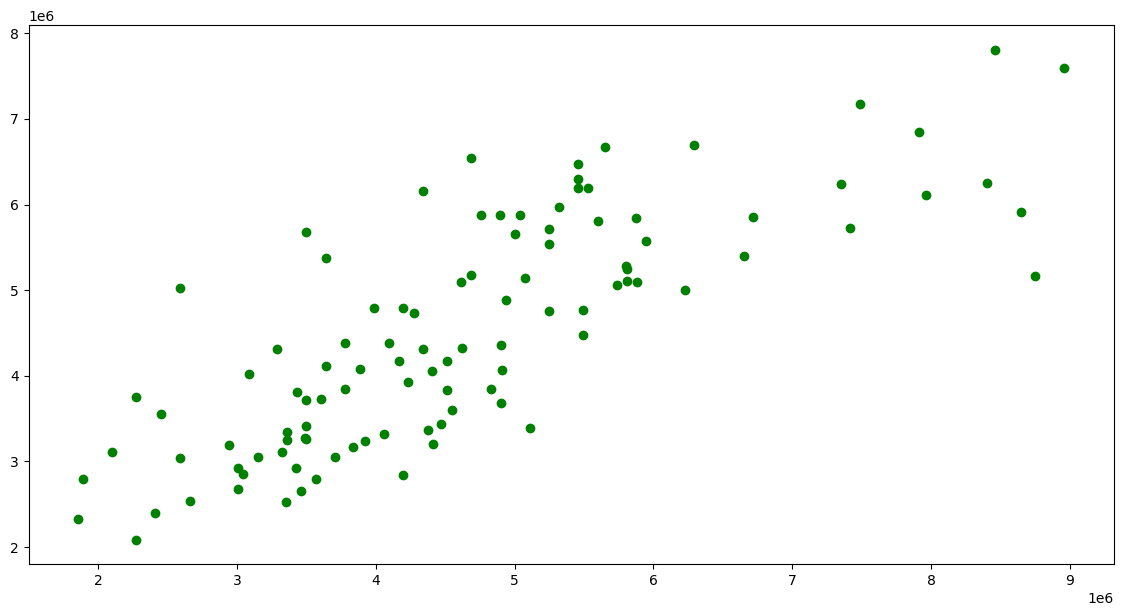

In [180]:
plt.figure(figsize = (14, 7))
plt.scatter(y_test, y_pred, c="g")

In the above scatter plot, we see data is in a line form, which means our model has done good predictions.

<Axes: xlabel='price', ylabel='Density'>

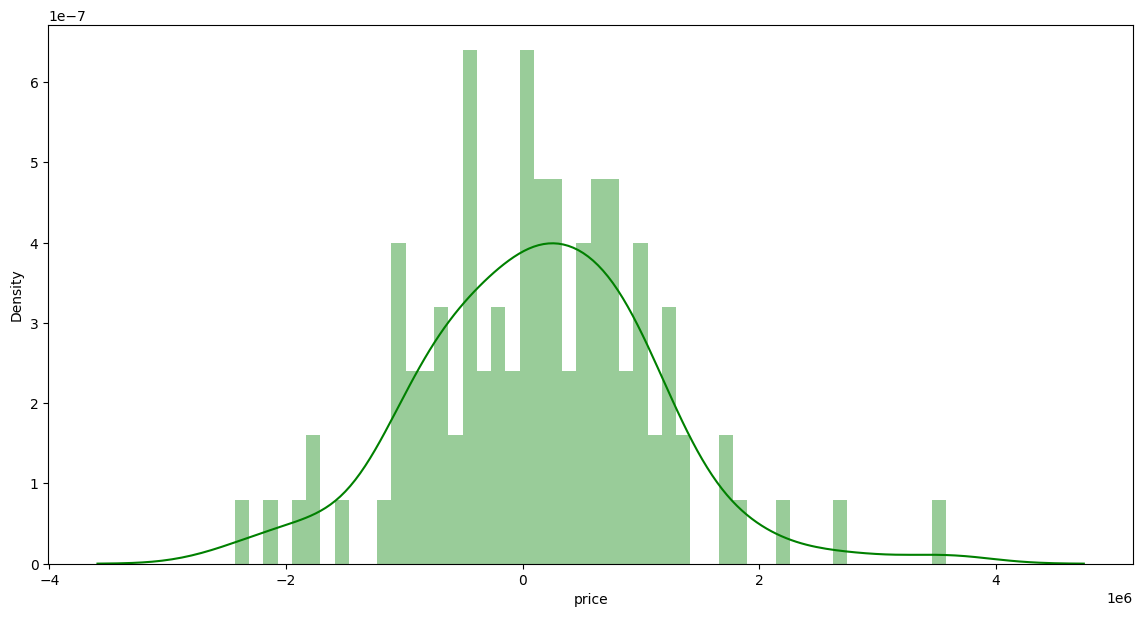

In [182]:
plt.figure(figsize = (14, 7))
sns.distplot((y_test-y_pred),bins=50,color="g")

In the above histogram plot, we see data is in bell shape (Normally Distributed), which means our model has done good predictions.